In [1]:
from scipy.io import loadmat
import scipy.optimize as optimizer
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
X = loadmat('ex4data1.mat')['X']
Y = loadmat('ex4data1.mat')['y'].flatten()
num_labels = 10
weights = loadmat('ex4weights.mat')
Theta1, Theta2 = weights['Theta1'], weights['Theta2']

In [3]:
def mnist_visualizer(x):
    '''
    imput is a (400,) array representing an mnist sample
    Converts the sample to (20,20) data and plots the sample number
    '''
    y = np.empty(shape =(20,20))
    for irow in range (20):
        y[irow,:] = x[20*irow:20*(irow+1)]
    w = 4
    h = 3
    d = 70
    plt.figure(figsize=(w, h), dpi=d)
    color_map = plt.imshow(np.transpose(y))
    color_map.set_cmap("Blues_r")
    plt.colorbar()

(5000,)

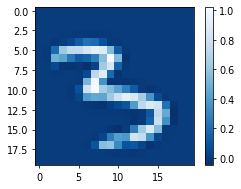

In [4]:
mnist_visualizer(X[1700])
Y.shape

In [5]:
def sigmoid (x):
    if type (x) == np.ndarray:
        return 1/(1 + np.exp(-x))
    else:
        return 1/(1+math.exp(-x))

In [6]:
# Setup the parameters you will use for this exercise
input_layer_size  = 400  
hidden_layer_size = 25   
num_labels = 10         
lamda = 1
nn_params = np.concatenate([Theta1.ravel(), Theta2.ravel()])

In [7]:
def encode_y (Y,num_labels):
    encoded_y = np.zeros (shape= (Y.shape[0], num_labels))
    for i,row in enumerate (encoded_y[:]):
        row[Y[i]-1] = 1
    return encoded_y

In [8]:
y_encoded = encode_y (Y, num_labels)

In [9]:
def sigmoidGradient (x):
    if type (x) == np.ndarray:
        sig_grad = sigmoid (x) * ( 1 - sigmoid(x) )
        return sig_grad
    else:
        sig_grad = sigmoid (x) * ( 1 - sigmoid(x) )
        return sig_grad

#Random initialization

In [10]:
def rand_initialize_weights (l_input, l_output, eps=0.12):
    theta = np.random.rand(l_output, 1 + l_input) * 2 * eps - eps
    return theta

In [11]:
initial_Theta1 = rand_initialize_weights(input_layer_size, hidden_layer_size)
initial_Theta2 = rand_initialize_weights(hidden_layer_size, num_labels)
initial_nn_params = np.concatenate([initial_Theta1.ravel(), initial_Theta2.ravel()], axis=0)

In [57]:
def nn_cost  (nn_params,
              input_layer_size,
              hidden_layer_size,
              num_labels,
              X, y, lamda=0
             ):
    m = X.shape[0]
    #Reshaping Theta1  and Theta 2 to matrix form from nn_params
    Theta1 = np.reshape( nn_params[:(input_layer_size + 1)*hidden_layer_size],
                        (hidden_layer_size,input_layer_size+1) )
    Theta2 = np.reshape( nn_params[(input_layer_size+1)*hidden_layer_size:],
                        (num_labels,hidden_layer_size+1) )
    #Forward propagation to get h_theta 
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    a2 = sigmoid( X @  np.transpose(Theta1)  ) 
    a2 = np.concatenate([np.ones((a2.shape[0], 1)), a2], axis=1)
    h_theta_i_k = sigmoid( a2 @   np.transpose(Theta2) )
    #h_theta_i_k is the last layer
    #calculate the cost of the network
    one = np.ones (shape= h_theta_i_k.shape)
    a = y * np.log (h_theta_i_k)
    b = (one - y) * np.log (one - h_theta_i_k)
    cost = 1/m * sum (sum (-a-b))
    #Regularized cost
    cost += ( sum (sum ( (Theta1*Theta1)[:,1:] ) ) + 
             sum (sum ( (Theta2*Theta2)[:,1:] ) ) ) * lamda / (2*m)
    Delta_2, Delta_1 = 0,0
    #Gard calculation 
    for t in range (m):
#         xi= X[i,:] # 1 X 401
#         a1i = a1[i,:] # 1 X 26
#         a2i =a2[i,:] # 1 X 10
#         d2 = a2i - y10[i,:]
#         d1 = Theta2.T @ d2.T * sigmoidGradient(np.hstack((1,xi @ Theta1.T)))
#         grad1= grad1 + d1[1:][:,np.newaxis] @ xi[:,np.newaxis].T
#         grad2 = grad2 + d2.T[:,np.newaxis] @ a1i[:,np.newaxis].T
        
        a1 = X[t,:] #401
        #forward propagation
        z2 = a1 @  np.transpose(Theta1)
        a2 = sigmoid (z2)
        a2 = np.insert (a2,0,1) #26
        z3 = a2 @  np.transpose(Theta2)
        a3 = sigmoid (z3) #10

        delta_2 = a3 - y[t] #10
        #Theta2 10X26
        delta_1 = ( np.transpose(Theta2) @ delta_2 ) * sigmoidGradient(np.insert (z2,0,1))
        Delta_2 += delta_2 @ np.transpose(a3)
        Delta_1 += delta_1 @ np.transpose(a2)
    grad_1 = 1/m * Delta_1
    grad_2 = 1/m * Delta_2
    return cost,grad_1,grad_2

In [58]:
cost = nn_cost  (nn_params,input_layer_size,hidden_layer_size,num_labels,X, y_encoded, lamda)
cost

0.3837698590909235